In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             
# sc.logging.print_header()
sc.settings.set_figure_params(dpi=140, fontsize=14, facecolor='white')

## Ery sub-clusters

In [3]:
adata = sc.read('/home/yiming/vio_analysis/sc/seuratobject/adata_ery.h5ad')

In [4]:
adata.X = adata.raw.X

In [5]:
bdata = sc.AnnData(adata.X)
bdata.obs = adata.obs
bdata.var['features'] = adata.var['features']
bdata.var_names = adata.var_names
bdata.obsm = adata.obsm
bdata.uns['celltype_colors'] = adata.uns['celltype_colors']
adata = bdata

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [7]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)


In [8]:
sc.tl.leiden(adata, key_added='leiden', resolution=1)

running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


In [9]:
adata.var['features'] = adata.var.index

In [10]:
adata.obs['subtype'] = adata.obs['leiden']
adata.obs['subtype'] = adata.obs['subtype'].replace(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 
                                                     '12', '13', '14'], 
                                                    ['earlyE', 'earlyE', 'earlyE', 'earlyE', 'earlyE', 
                                                     'earlyE', 'earlyE', 'orthoE', 'proE', 'earlyE',
                                                     'orthoE', 'earlyE', 'earlyE', 'earlyE', 'orthoE'])

In [12]:
adata.uns['subtype_colors'] = ['#E07A5F', '#BC4749', '#F6BD60']

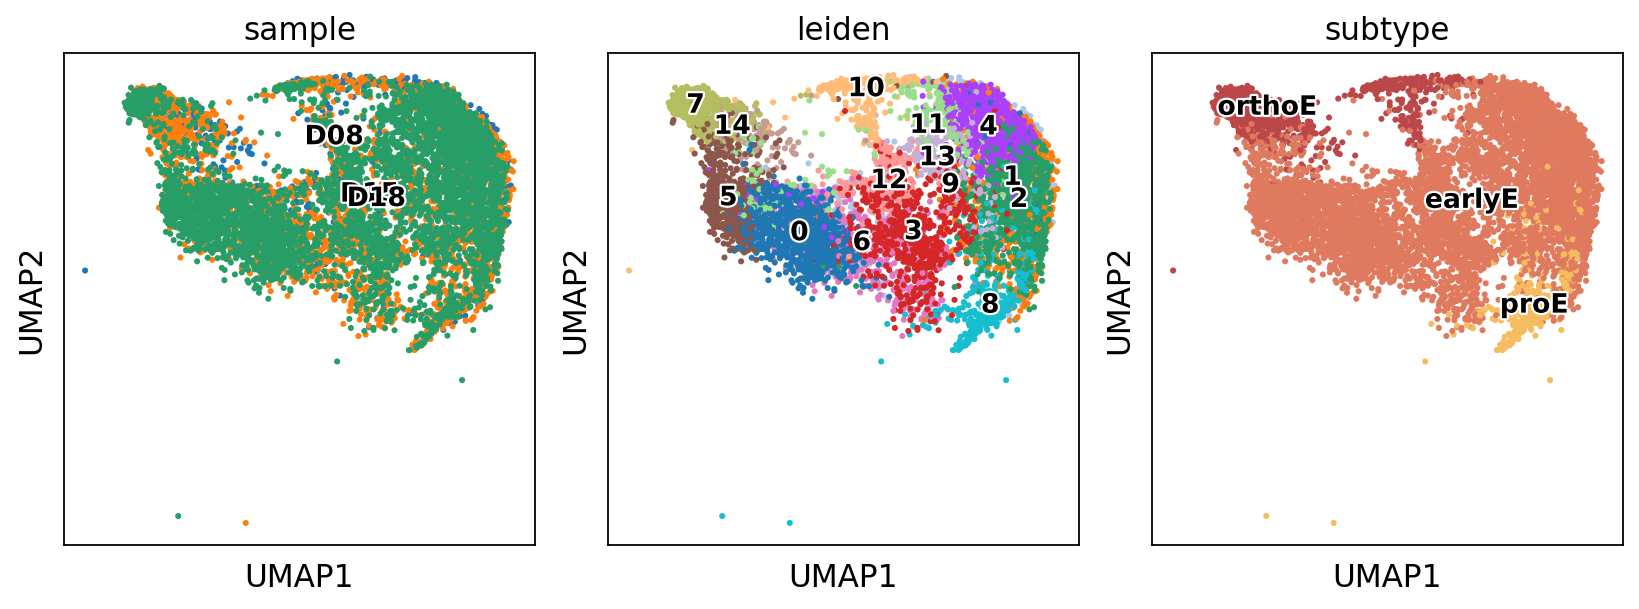

In [15]:
sc.pl.umap(adata, color=['sample', 'leiden', 'subtype'], legend_loc='on data', wspace=0.05, 
          legend_fontsize=12, legend_fontoutline=2, s=30, ncols=3)

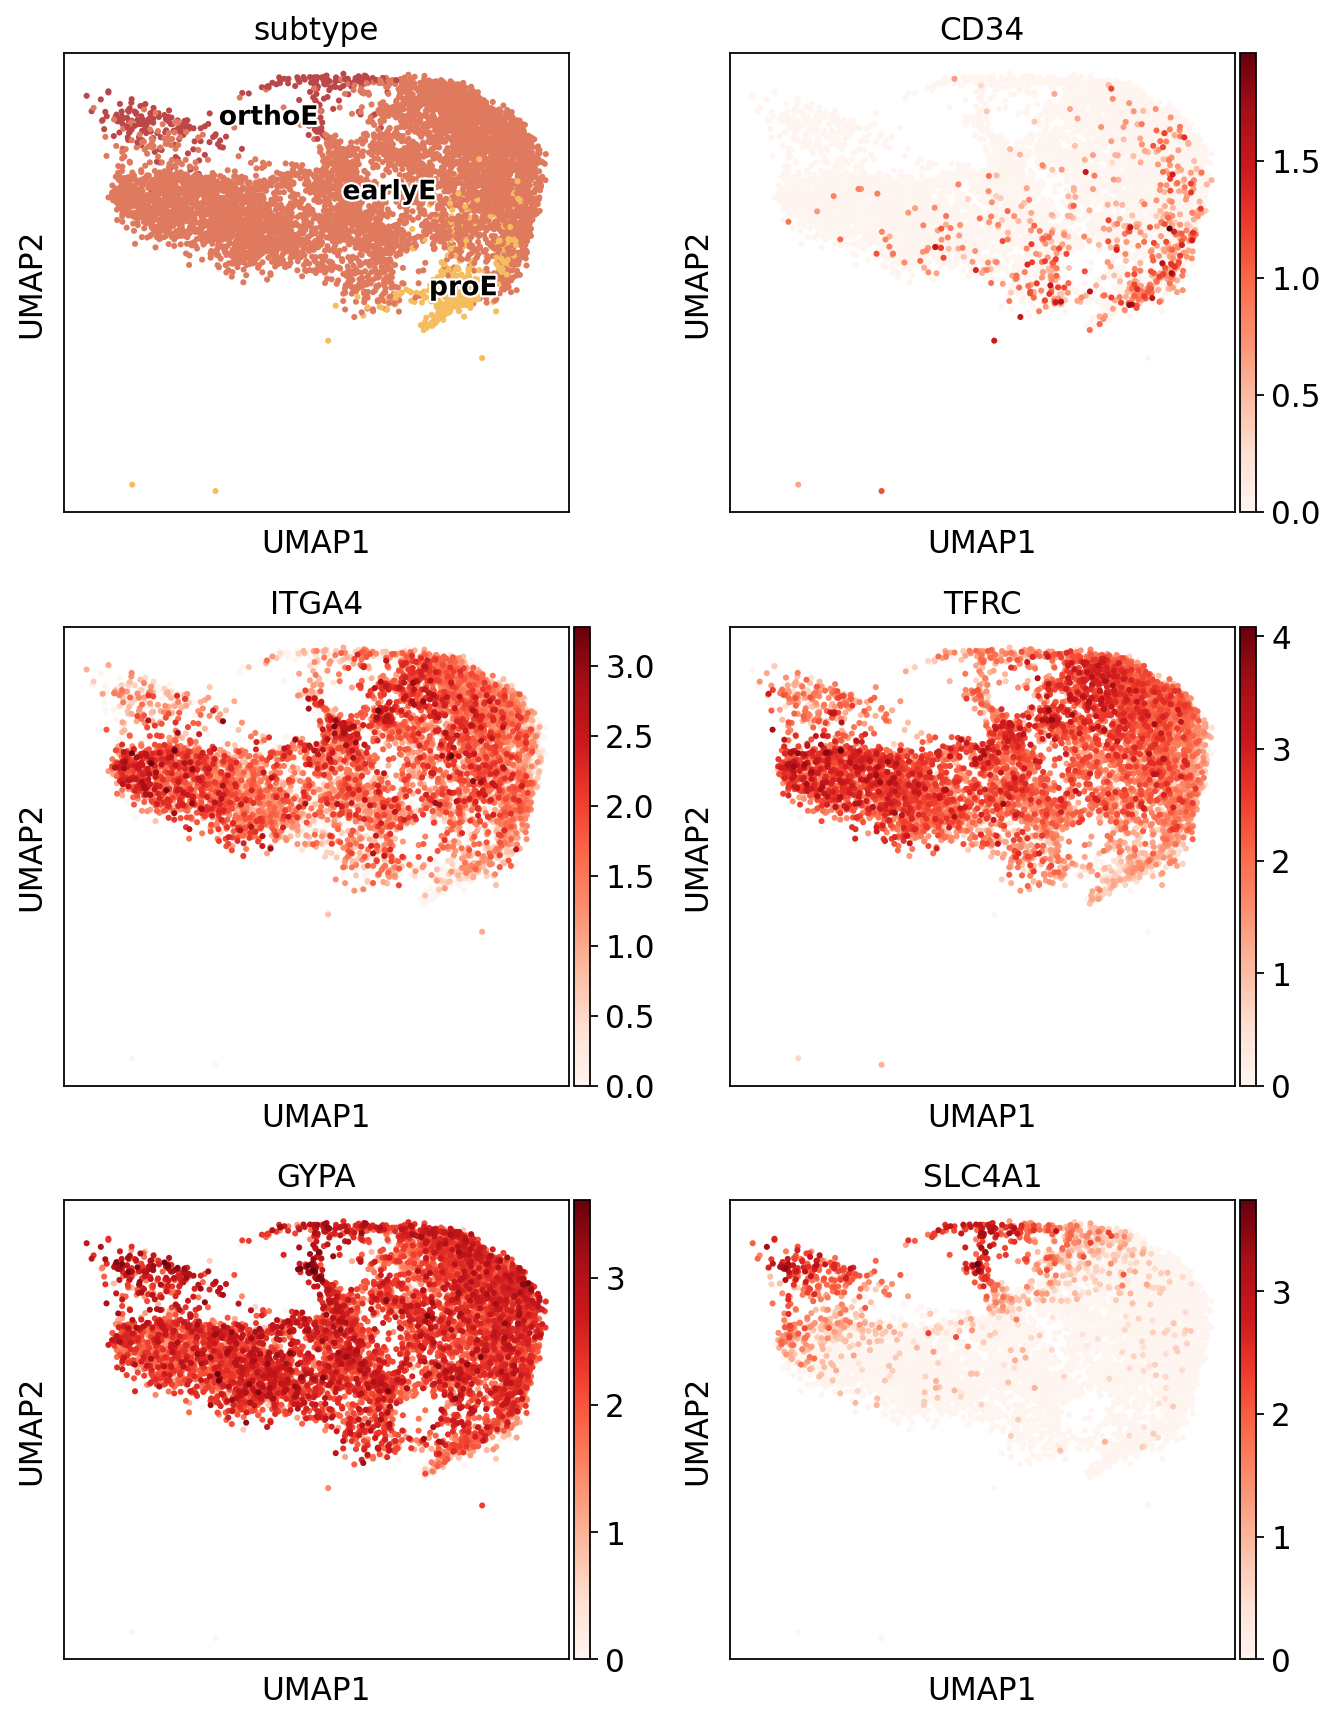

In [29]:
sc.pl.umap(adata, color=['subtype', 'CD34', 'ITGA4', 'TFRC', 'GYPA', 'SLC4A1'], legend_loc='on data', cmap='Reds', wspace=0.2, 
          legend_fontsize=12, legend_fontoutline=2, s=30, ncols=2)

In [8]:
num = list(np.arange(0, 3, 1))
sample_order = ['D08', 'D15', 'D18']
sample_dict = dict(zip(num, sample_order))

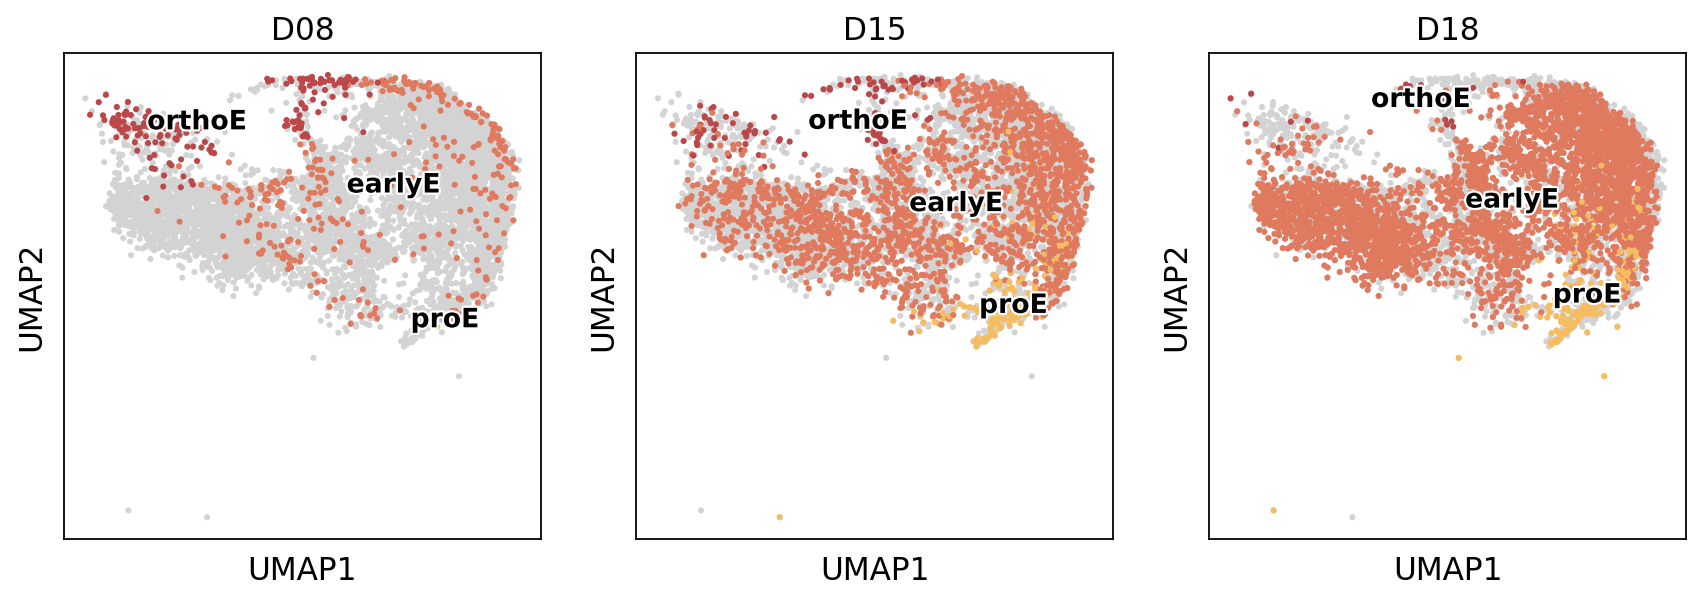

In [9]:
fig,axs = plt.subplots(1, 3, figsize=(13, 4), gridspec_kw={'hspace':0.3,})
axs = axs.flatten()
for i in sample_dict:
    sc.pl.umap(adata, size=30, show=False, ax=axs[i], return_fig=fig)
    sc.pl.umap(adata[adata.obs['sample'] == sample_order[i]], color='subtype', 
               legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, size=30, show=False, 
               return_fig=fig, ax=axs[i], title=sample_order[i])
plt.show()

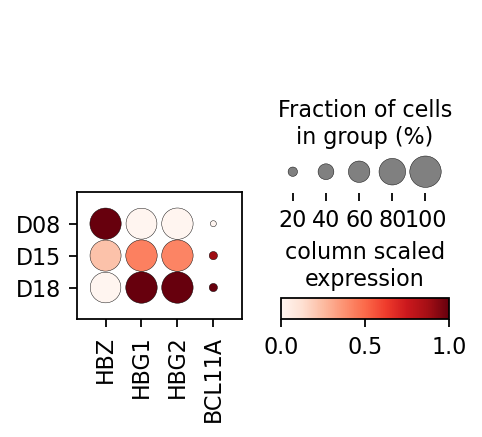

In [11]:
sc.pl.dotplot(adata, ['HBZ', 'HBG1', 'HBG2', 'BCL11A'], 'sample', dendrogram=False, 
             standard_scale='var', colorbar_title='column scaled\nexpression', 
             categories_order=['D08', 'D15', 'D18'])

In [4]:
marker_genes_dict2 = {
    'pri-ery': ['HBZ'], 
    'ery': ['HBG1', 'HBG2']
}

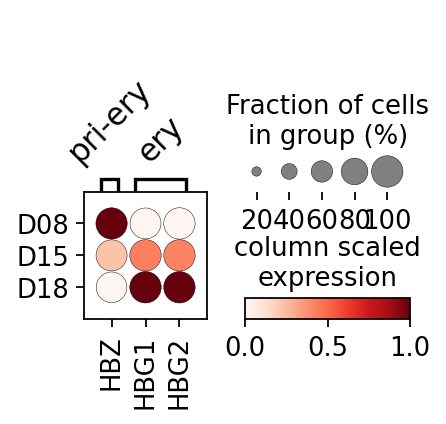

In [17]:
sc.pl.dotplot(adata, marker_genes_dict2, 'sample', dendrogram=False, var_group_rotation=45,
             standard_scale='var', colorbar_title='column scaled\nexpression', 
             categories_order=['D08', 'D15', 'D18'])

## Ery dpt

In [3]:
adata = sc.read('/home/yiming/vio_analysis/sc/seuratobject/adata_ery_new_leiden.h5ad')
adata.uns['log1p']['base'] = None

In [4]:
sc.pp.neighbors(adata, n_neighbors=30, method='gauss', knn=False, key_added='diff')
adata.uns['iroot'] = np.flatnonzero(adata.obs['subtype'] == 'proE')[0]
sc.tl.diffmap(adata, n_comps=10, neighbors_key='diff')
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['diff']`
    `.obsp['diff_distances']`, distances for each pair of neighbors
    `.obsp['diff_connectivities']`, weighted adjacency matrix (0:00:05)
computing Diffusion Maps using n_comps=10(=n_dcs)
computing transitions
    finished (0:00:02)
    eigenvalues of transition matrix
    [1.0000026  0.92407835 0.8550377  0.81291133 0.7764812  0.74083346
     0.6710102  0.6510588  0.61707544 0.5841756 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:05)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


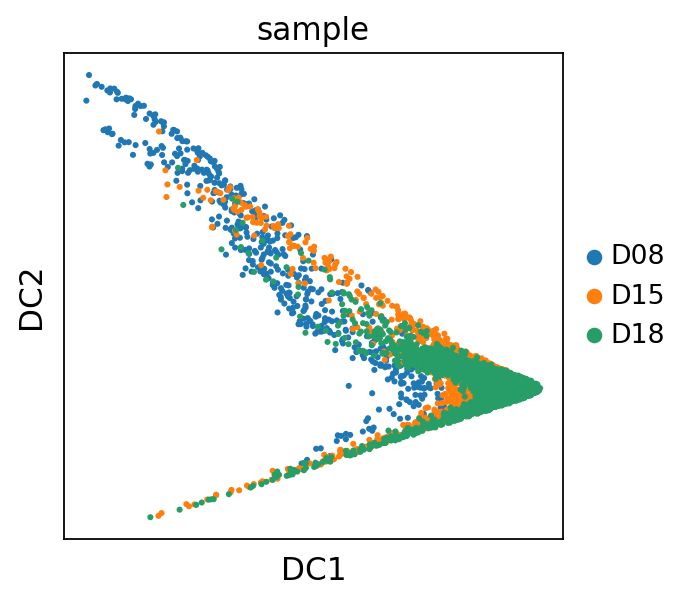

In [6]:
sc.pl.diffmap(adata, color=['sample'], 
             legend_fontsize=12, legend_fontoutline=2, s=30, 
#            legend_loc='on data', 
             )

In [10]:
sc.pp.neighbors(adata, n_neighbors=30, method='gauss', knn=False, key_added='diff')
adata.uns['iroot'] = np.flatnonzero(adata.obs['subtype'] == 'proE')[0]
sc.tl.diffmap(adata, n_comps=10, neighbors_key='diff')
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['diff']`
    `.obsp['diff_distances']`, distances for each pair of neighbors
    `.obsp['diff_connectivities']`, weighted adjacency matrix (0:00:05)
computing Diffusion Maps using n_comps=10(=n_dcs)
computing transitions
    finished (0:00:03)
    eigenvalues of transition matrix
    [1.0000026  0.92407835 0.8550377  0.81291133 0.7764812  0.74083346
     0.6710102  0.6510588  0.61707544 0.5841756 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:07)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


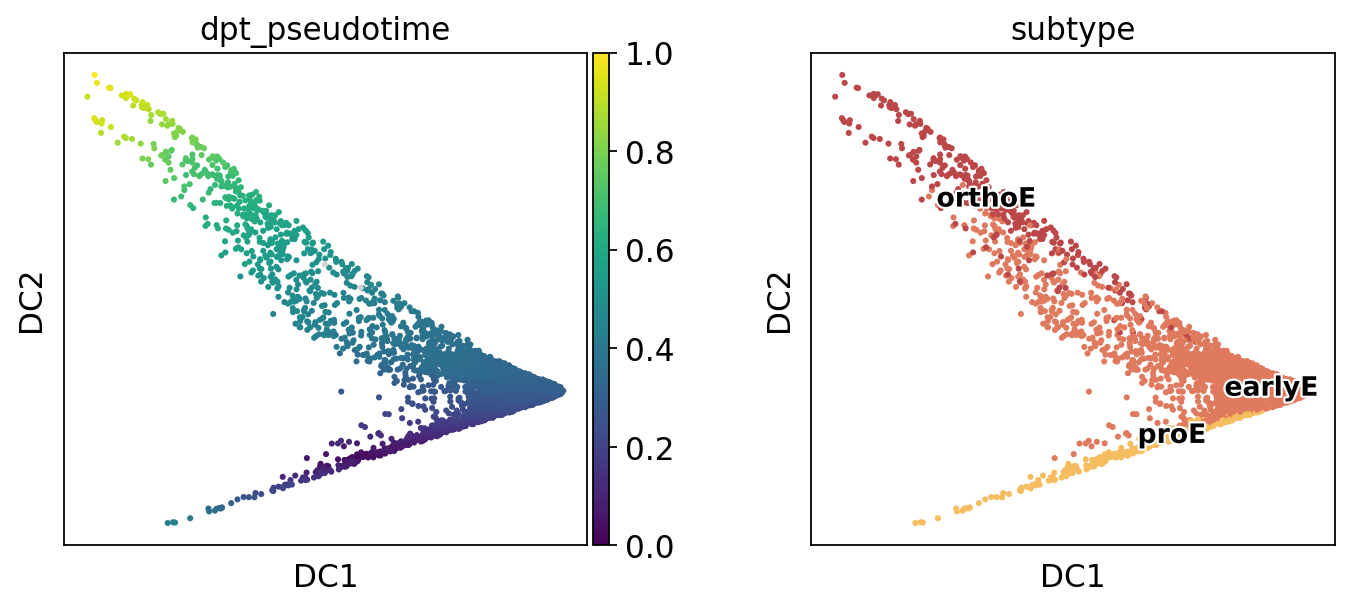

In [15]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'subtype'], 
             legend_fontsize=12, legend_fontoutline=2, s=30, wspace=0.3, 
           legend_loc='on data')

## abundance

In [10]:
adata = sc.read('/home/yiming/vio_analysis/revision/res17_adata_anno_3.h5ad')

In [29]:
adata_sub = adata[adata.obs['celltype'].isin(['HPC', 'EMP', 'proE', 'earlyE', 'orthoE', 'Mk'])]

In [30]:
cell_prop = adata_sub.obs[['celltype', 'sample']]
cell_prop

,celltype,sample
VIO_D08_AAACCCAGTCTTTCAT-1,EMP,D08
VIO_D08_AAACGAACATTGAAGA-1,earlyE,D08
VIO_D08_AAAGGATAGTCTGTAC-1,EMP,D08
VIO_D08_AAAGGGCTCTTACCGC-1,orthoE,D08
VIO_D08_AAAGTGAGTCGAGTGA-1,earlyE,D08
...,...,...
VIO_D18_TTTGTTGTCACTGGTA-1,Mk,D18
VIO_D18_TTTGTTGTCGGCTTGG-1,Mk,D18
VIO_D18_TTTGTTGTCTCATAGG-1,earlyE,D18
VIO_D18_TTTGTTGTCTCTAGGA-1,earlyE,D18


In [31]:
cell_prop['count'] = np.ones((cell_prop.shape[0],))
cell_prop_matrix = pd.pivot_table(cell_prop, values='count', index='sample', columns='celltype', aggfunc='sum')
# pd.DataFrame.to_csv(cell_prop_matrix, 'cell_prop_matrix.csv')
cell_prop_matrix

/tmp/ipykernel_90975/3774721064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_prop['count'] = np.ones((cell_prop.shape[0],))


celltype,EMP,HPC,Mk,earlyE,orthoE,proE
sample,,,,,,
D08,102.0,0.0,13.0,336.0,179.0,3.0
D15,1135.0,199.0,948.0,1911.0,105.0,192.0
D18,1462.0,526.0,3185.0,3810.0,19.0,194.0


In [32]:
cellprop_perc = cell_prop_matrix.divide(cell_prop_matrix.sum(axis=1), axis=0)
cellprop_perc = cellprop_perc.reindex(columns=['HPC', 'EMP', 'Mk', 'proE', 'earlyE', 'orthoE'])
cellprop_perc

celltype,HPC,EMP,Mk,proE,earlyE,orthoE
sample,,,,,,
D08,0.000000,0.161137,0.020537,0.004739,0.530806,0.282780
D15,0.044321,0.252784,0.211136,0.042762,0.425612,0.023385
D18,0.057199,0.158982,0.346346,0.021096,0.414311,0.002066


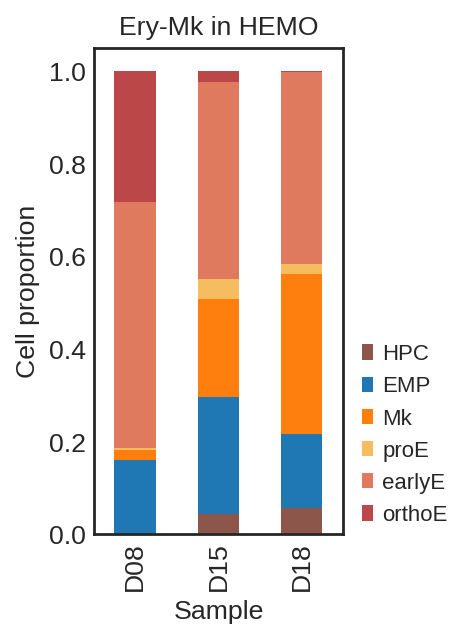

In [33]:
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (2, 4)
plt.rcParams["figure.dpi"] = 80
cellprop_perc.plot.bar(stacked=True, legend=True, color=['#8c564b', '#1f77b4', '#ff7f0e', '#F6BD60', '#E07A5F', '#BC4749'])
plt.legend(loc=(1.04, 0), fontsize='small')
plt.xlabel('Sample')
plt.ylabel('Cell proportion')
plt.title('Ery-Mk in HEMO')
plt.show()